# Indian Weather Data (EDA Project)

### Dataset Source  
[Kaggle: Indian Weather Data](https://www.kaggle.com/datasets/pratikjadhav05/indian-weather-data)  

### Dataset Summary
- **Total Entries:** 24,070  
- **Time Period:** **August 25, 2023 (21:46:41) → August 26, 2023 (04:27:50)**
- **Time Granularity:** Minute-level data  

# Setup and sanatize data


In [1]:
import warnings
warnings.filterwarnings("ignore")  # Ignore all warnings

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df = pd.read_csv('Weather-data.csv')


In [4]:
df
# print(df.info())
# print(df.isnull().sum())
# print(df.describe())
# print(df.columns )

last_updated_epoch  temperature_celsius  temperature_fahrenheit  \
0              1693000001                 27.5                    81.5   
1              1693000002                 27.5                    81.5   
2              1693000003                 26.3                    79.3   
3              1693000004                 25.6                    78.1   
4              1693000005                 27.2                    81.0   
...                   ...                  ...                     ...   
24065          1693024066                 26.0                    78.8   
24066          1693024067                 22.5                    72.5   
24067          1693024068                 24.7                    76.5   
24068          1693024069                 22.2                    72.0   
24069          1693024070                 26.7                    80.1   

       wind_mph  wind_kph  wind_degree wind_direction  pressure_mb  \
0          12.8      20.5          281            WNW         1008   
1           9.6      15.5          287            WNW         1008   
2          11.4      18.4          317             NW         1009   
3          10.5      16.9          297            WNW         1009   
4          10.1      16.2          274              W         1009   
...         ...       ...          ...            ...          ...   
24065       4.3       6.8          320             NW         1010   
24066       2.2       3.6          123            ESE         1011   
24067       2.2       3.6           83              E         1009   
24068       6.3      10.1          267              W         1011   
24069       2.2       3.6          346            NNW         1012   

       pressure_in  precip_mm  precip_in  humidity  cloud  feels_like_celsius  \
0            29.77       0.00       0.00        67     26                29.7   
1            29.78       0.00       0.00        70     19                30.0   
2            29.78       0.00       0.00        70     51                28.2   
3            29.80       0.00       0.00        76     65                27.6   
4            29.79       0.00       0.00        74     82                29.9   
...            ...        ...        ...       ...    ...                 ...   
24065        29.83       0.00       0.00        70      0                26.7   
24066        29.85       0.01       0.00        99    100                25.1   
24067        29.81       0.28       0.01        90     71                27.3   
24068        29.85       0.03       0.00        88     75                24.6   
24069        29.88       0.00       0.00        69      8                28.7   

       feels_like_fahrenheit  visibility_km  visibility_miles  uv_index  \
0                       85.5           10.0                 6         7   
1                       86.0           10.0                 6         7   
2                       82.8           10.0                 6         7   
3                       81.7           10.0                 6         6   
4                       85.8           10.0                 6         6   
...                      ...            ...               ...       ...   
24065                   80.0            2.5                 1         1   
24066                   77.1            0.0                 0         1   
24067                   81.2            9.0                 5         1   
24068                   76.3           10.0                 6         1   
24069                   83.7           10.0                 6         1   

       gust_mph  gust_kph  
0          14.8      23.8  
1          11.2      18.0  
2          13.2      21.2  
3          13.0      20.9  
4          11.6      18.7  
...         ...       ...  
24065       8.0      12.9  
24066       1.4       2.2  
24067       3.1       4.9  
24068      11.5      18.5  
24069       2.2       3.6  

[24070 rows x 20 columns]

### As we only have 8 hours of data , converting it to relative hours

In [5]:
import pandas as pd
import numpy as np

# --- Step 1: Convert Timestamp to Datetime Format ---
df['Date'] = pd.to_datetime(df['last_updated_epoch'], unit='s')

# --- Step 2: Create 'Hour' Column ---
df['Hour'] = df['Date'].dt.hour  

# --- Step 3: Copy Data & Prepare for Transformation ---
df2 = df.copy()
df2.set_index('Date', inplace=True)  # Set 'Date' as the index for easy time-based operations

# --- Step 4: Floor to the Nearest Hour for Consistency ---
df2['Hour_Floor'] = df2.index.floor('H')  # Rounds timestamps down to the nearest hour

# --- Step 5: Create a Mapping for Relative Hours ---
unique_hours = sorted(df2['Hour_Floor'].unique())  # Get sorted unique hourly timestamps
relative_mapping = {hour: i + 1 for i, hour in enumerate(unique_hours)}  # Assign Relative Hours

# --- Step 6: Apply the Mapping ---
df2['Relative_Hour'] = df2['Hour_Floor'].map(relative_mapping)  # Assign relative hours

# --- Step 7: Replace 'Hour' Column with Relative Values ---
df2['Hour'] = df2['Relative_Hour']

# --- Step 8: Reset Index to Restore 'Date' Column ---
df2.reset_index(inplace=True)

# --- Step 9: Create Readable Time Labels for X-Axis ---
hour_to_time = df2.groupby('Hour', as_index=False)['Date'].min().set_index('Hour')['Date'].to_dict()
hour_labels = {hour: time.strftime('%H:%M') for hour, time in hour_to_time.items()}  # Convert to 'HH:MM' format

# --- Step 10: Drop Unnecessary Columns ---
drop_cols = ['last_updated_epoch', 'temperature_fahrenheit', 'feels_like_fahrenheit',
             'visibility_miles', 'wind_mph', 'gust_mph', 'pressure_in', 'precip_in',
             'feels_like_celsius', 'Hour_Floor', 'Relative_Hour']
df2.drop(columns=drop_cols, errors='ignore', inplace=True)  # `errors='ignore'` avoids issues if columns are missing

# --- Step 11: Remove Any Remaining Missing Data ---
df2.dropna(inplace=True)

# --- Step 12: Extend Hour Range Naturally (Without Data Duplication) ---
max_hour = df2['Hour'].max()
full_hours = pd.DataFrame({'Hour': np.arange(1, max_hour + 2)})  # Generate hours from 1 to (max + 1)
df2 = full_hours.merge(df2, on='Hour', how='left')  # Merge with actual data

# --- Step 13: Display Final Data for Verification ---
df2

Hour                Date  temperature_celsius  wind_kph  wind_degree  \
0         1 2023-08-25 21:46:41                 27.5      20.5        281.0   
1         1 2023-08-25 21:46:42                 27.5      15.5        287.0   
2         1 2023-08-25 21:46:43                 26.3      18.4        317.0   
3         1 2023-08-25 21:46:44                 25.6      16.9        297.0   
4         1 2023-08-25 21:46:45                 27.2      16.2        274.0   
...     ...                 ...                  ...       ...          ...   
24066     8 2023-08-26 04:27:47                 22.5       3.6        123.0   
24067     8 2023-08-26 04:27:48                 24.7       3.6         83.0   
24068     8 2023-08-26 04:27:49                 22.2      10.1        267.0   
24069     8 2023-08-26 04:27:50                 26.7       3.6        346.0   
24070     9                 NaT                  NaN       NaN          NaN   

      wind_direction  pressure_mb  precip_mm  humidity  cloud  visibility_km  \
0                WNW       1008.0       0.00      67.0   26.0           10.0   
1                WNW       1008.0       0.00      70.0   19.0           10.0   
2                 NW       1009.0       0.00      70.0   51.0           10.0   
3                WNW       1009.0       0.00      76.0   65.0           10.0   
4                  W       1009.0       0.00      74.0   82.0           10.0   
...              ...          ...        ...       ...    ...            ...   
24066            ESE       1011.0       0.01      99.0  100.0            0.0   
24067              E       1009.0       0.28      90.0   71.0            9.0   
24068              W       1011.0       0.03      88.0   75.0           10.0   
24069            NNW       1012.0       0.00      69.0    8.0           10.0   
24070            NaN          NaN        NaN       NaN    NaN            NaN   

       uv_index  gust_kph  
0           7.0      23.8  
1           7.0      18.0  
2           7.0      21.2  
3           6.0      20.9  
4           6.0      18.7  
...         ...       ...  
24066       1.0       2.2  
24067       1.0       4.9  
24068       1.0      18.5  
24069       1.0       3.6  
24070       NaN       NaN  

[24071 rows x 13 columns]

# Hourly Analysis

all analysis based on relative hours assigned earlier

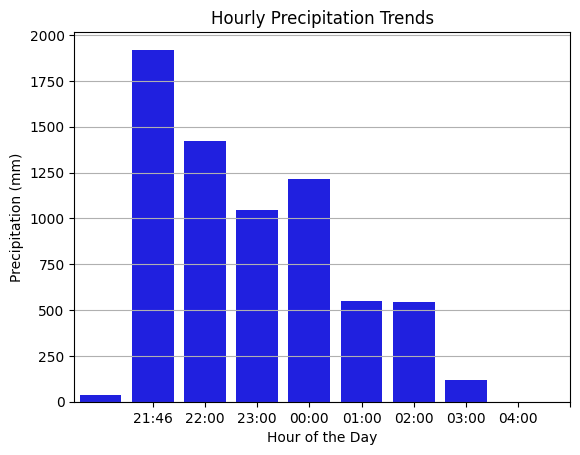

In [6]:
hourly_precip = df2.groupby('Hour', as_index=False)['precip_mm'].sum()

sns.barplot(x='Hour', y='precip_mm', data=hourly_precip, color="blue")
plt.xlabel("Hour of the Day")
plt.ylabel("Precipitation (mm)")
plt.title("Hourly Precipitation Trends")
plt.xticks(ticks=hourly_precip['Hour'], labels=[hour_labels.get(h, '') for h in hourly_precip['Hour']])
plt.grid(axis='y')
plt.show()


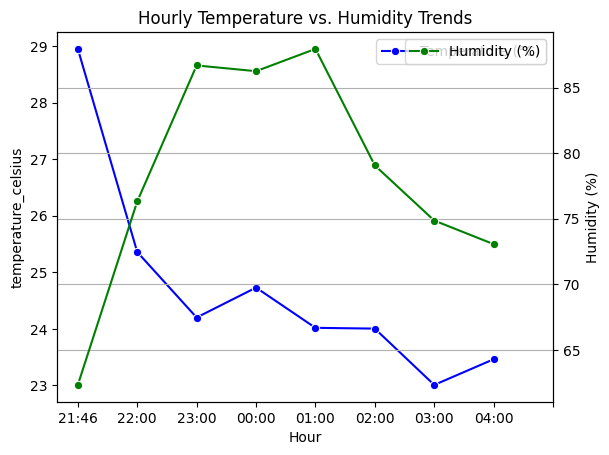

In [7]:
hourly_data = df2.groupby('Hour')[['temperature_celsius', 'humidity']].mean().reset_index()

sns.lineplot(x='Hour', y='temperature_celsius', data=hourly_data, marker='o', color='b', label='Temperature (°C)') # mean hourly Temperature 
ax2 = plt.gca().twinx()  # Create a secondary y-axis
sns.lineplot(x='Hour', y='humidity', data=hourly_data, marker='o', color='g', label='Humidity (%)', ax=ax2) #and plot humidity here

plt.xlabel("Hour of the Day")
plt.title("Hourly Temperature vs. Humidity Trends")
plt.ylabel("Humidity (%)")
plt.xticks(ticks=hourly_precip['Hour'], labels=[hour_labels.get(h, '') for h in hourly_precip['Hour']]) #actual time instead of relative hours
plt.grid(True)
plt.show()


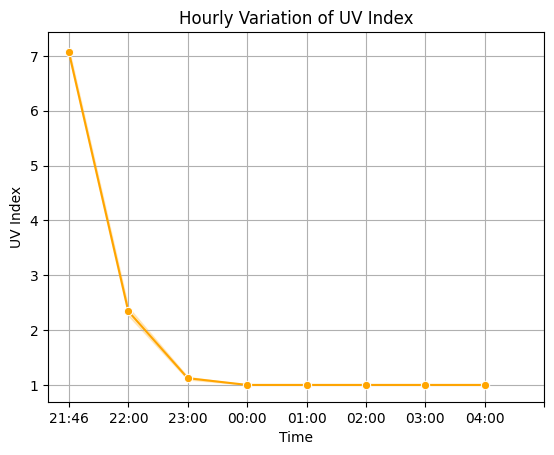

In [8]:
sns.lineplot(data=df2, x="Hour", y="uv_index", marker="o", color="orange")
plt.xlabel("Time")
plt.ylabel("UV Index")
plt.title("Hourly Variation of UV Index")
plt.grid()
plt.xticks(ticks=hourly_precip['Hour'], labels=[hour_labels.get(h, '') for h in hourly_precip['Hour']])
plt.show()


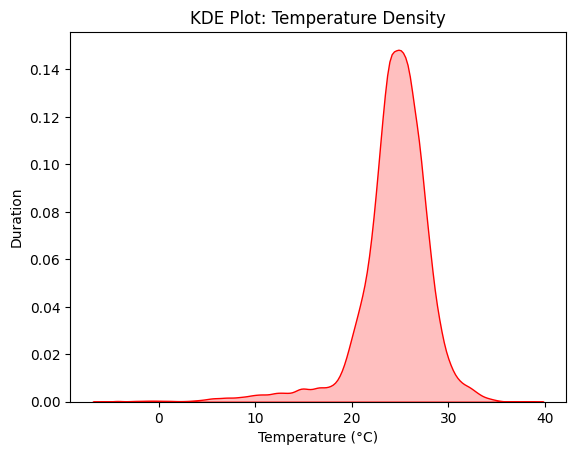

In [9]:
sns.kdeplot(df2["temperature_celsius"], shade=True, color="red")
plt.xlabel("Temperature (°C)")
plt.ylabel("Duration")
plt.title("KDE Plot: Temperature Density")
plt.show()


# Simultaneous Visualization 

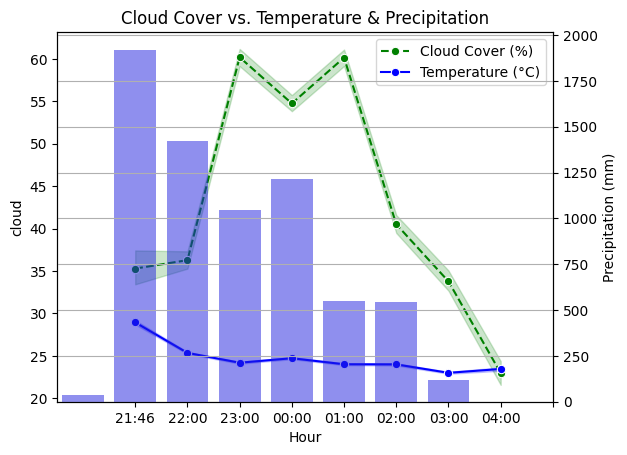

In [10]:
sns.lineplot(x='Hour', y='cloud', data=df2, marker='o', linestyle = 'dashed', color='green', label='Cloud Cover (%)')
sns.lineplot(x='Hour', y='temperature_celsius', data=df2, marker='o', color='b', label='Temperature (°C)')
ax2 = plt.gca().twinx() # Overlay Precipitation (secondary y-axis)
sns.barplot(x='Hour', y='precip_mm', data=hourly_precip, color='blue', alpha=0.5, ax=ax2)

plt.xlabel("Hour of the Day")
plt.title("Cloud Cover vs. Temperature & Precipitation")
ax2.set_ylabel("Precipitation (mm)")
plt.xticks(ticks=hourly_precip['Hour'], labels=[hour_labels.get(h, '') for h in hourly_precip['Hour']])
plt.grid(True)
plt.show()


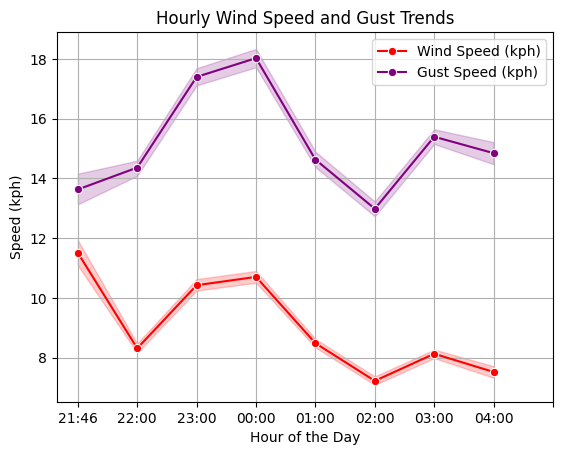

In [11]:
sns.lineplot(data=df2 , x='Hour', y='wind_kph',  marker='o', color='red', label='Wind Speed (kph)')
sns.lineplot( data=df2, x='Hour', y='gust_kph', marker='o', color='purple', label='Gust Speed (kph)')

plt.xlabel("Hour of the Day")
plt.ylabel("Speed (kph)")
plt.title("Hourly Wind Speed and Gust Trends")
plt.xticks(ticks=hourly_precip['Hour'], labels=[hour_labels.get(h, '') for h in hourly_precip['Hour']])
plt.legend()
plt.grid(True)
plt.show()


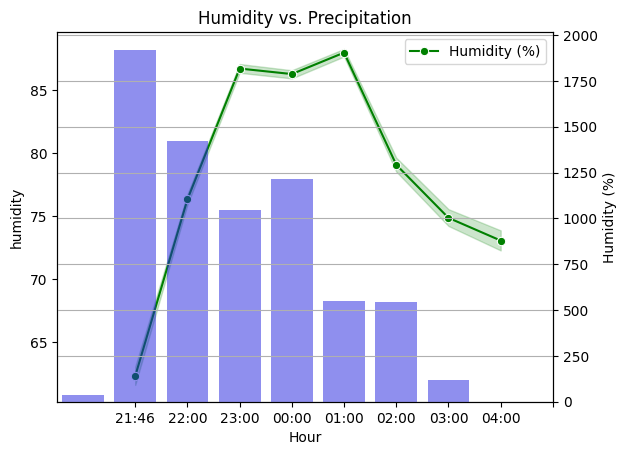

In [12]:
sns.lineplot(x='Hour', y='humidity', data=df2, marker='o', color='g', label='Humidity (%)')
ax2 = plt.gca().twinx()
sns.barplot(x='Hour', y='precip_mm', data=hourly_precip, color='blue', alpha=0.5, ax=ax2)

plt.xlabel("Hour of the Day")
plt.title("Humidity vs. Precipitation")
ax2.set_ylabel("Precipitation (mm)")
plt.ylabel("Humidity (%)")
plt.xticks(ticks=hourly_precip['Hour'], labels=[hour_labels.get(h, '') for h in hourly_precip['Hour']])
plt.grid(True)
plt.show()


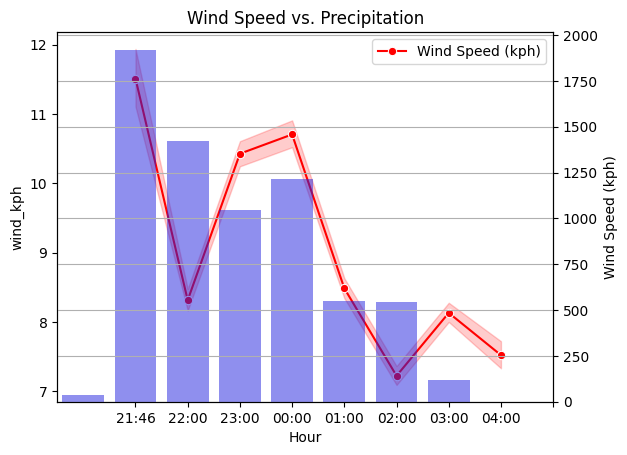

In [13]:
sns.lineplot(x='Hour', y='wind_kph', data=df2, marker='o', color='red', label='Wind Speed (kph)')

# Overlay Precipitation (secondary y-axis)
ax2 = plt.gca().twinx()
sns.barplot(x='Hour', y='precip_mm', data=hourly_precip, color='blue', alpha=0.5, ax=ax2)

# Labels and title
plt.xlabel("Hour of the Day")
plt.title("Wind Speed vs. Precipitation")
ax2.set_ylabel("Precipitation (mm)")
plt.ylabel("Wind Speed (kph)")
plt.xticks(ticks=hourly_precip['Hour'], labels=[hour_labels.get(h, '') for h in hourly_precip['Hour']])

plt.grid(True)

# Show the plot
plt.show()

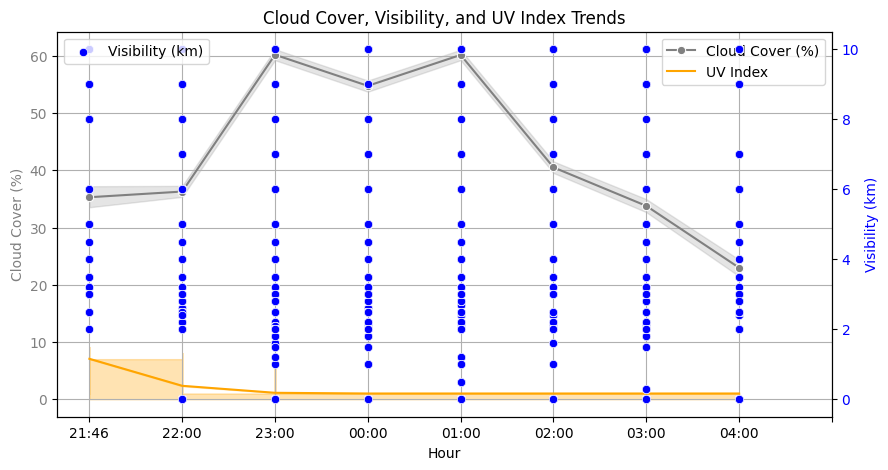

In [14]:

fig, ax1 = plt.subplots(figsize=(10, 5))

# Line plot for Cloud Cover
sns.lineplot(x='Hour', y='cloud', data=df2, marker='o', color='gray', label='Cloud Cover (%)', ax=ax1)
ax1.set_ylabel("Cloud Cover (%)", color='gray')
ax1.tick_params(axis='y', labelcolor='gray')

# Overlay Scatter for Visibility (Secondary Y-Axis)
ax2 = ax1.twinx()
sns.scatterplot(x='Hour', y='visibility_km', data=df2, color='blue', label='Visibility (km)', ax=ax2)
ax2.set_ylabel("Visibility (km)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Overlay UV Index as Area Plot
sns.lineplot(x='Hour', y='uv_index', data=df2, color='orange', label='UV Index', ax=ax1)
ax1.fill_between(df2['Hour'], df2['uv_index'], alpha=0.3, color='orange')

# Labels and Title
plt.xlabel("Hour of the Day")
plt.title("Cloud Cover, Visibility, and UV Index Trends")
plt.xticks(ticks=hourly_precip['Hour'], labels=[hour_labels.get(h, '') for h in hourly_precip['Hour']])

ax1.grid(True)

# Show Plot
plt.legend(loc='upper left')
plt.show()


# Pairplot (multiple variables against each other)

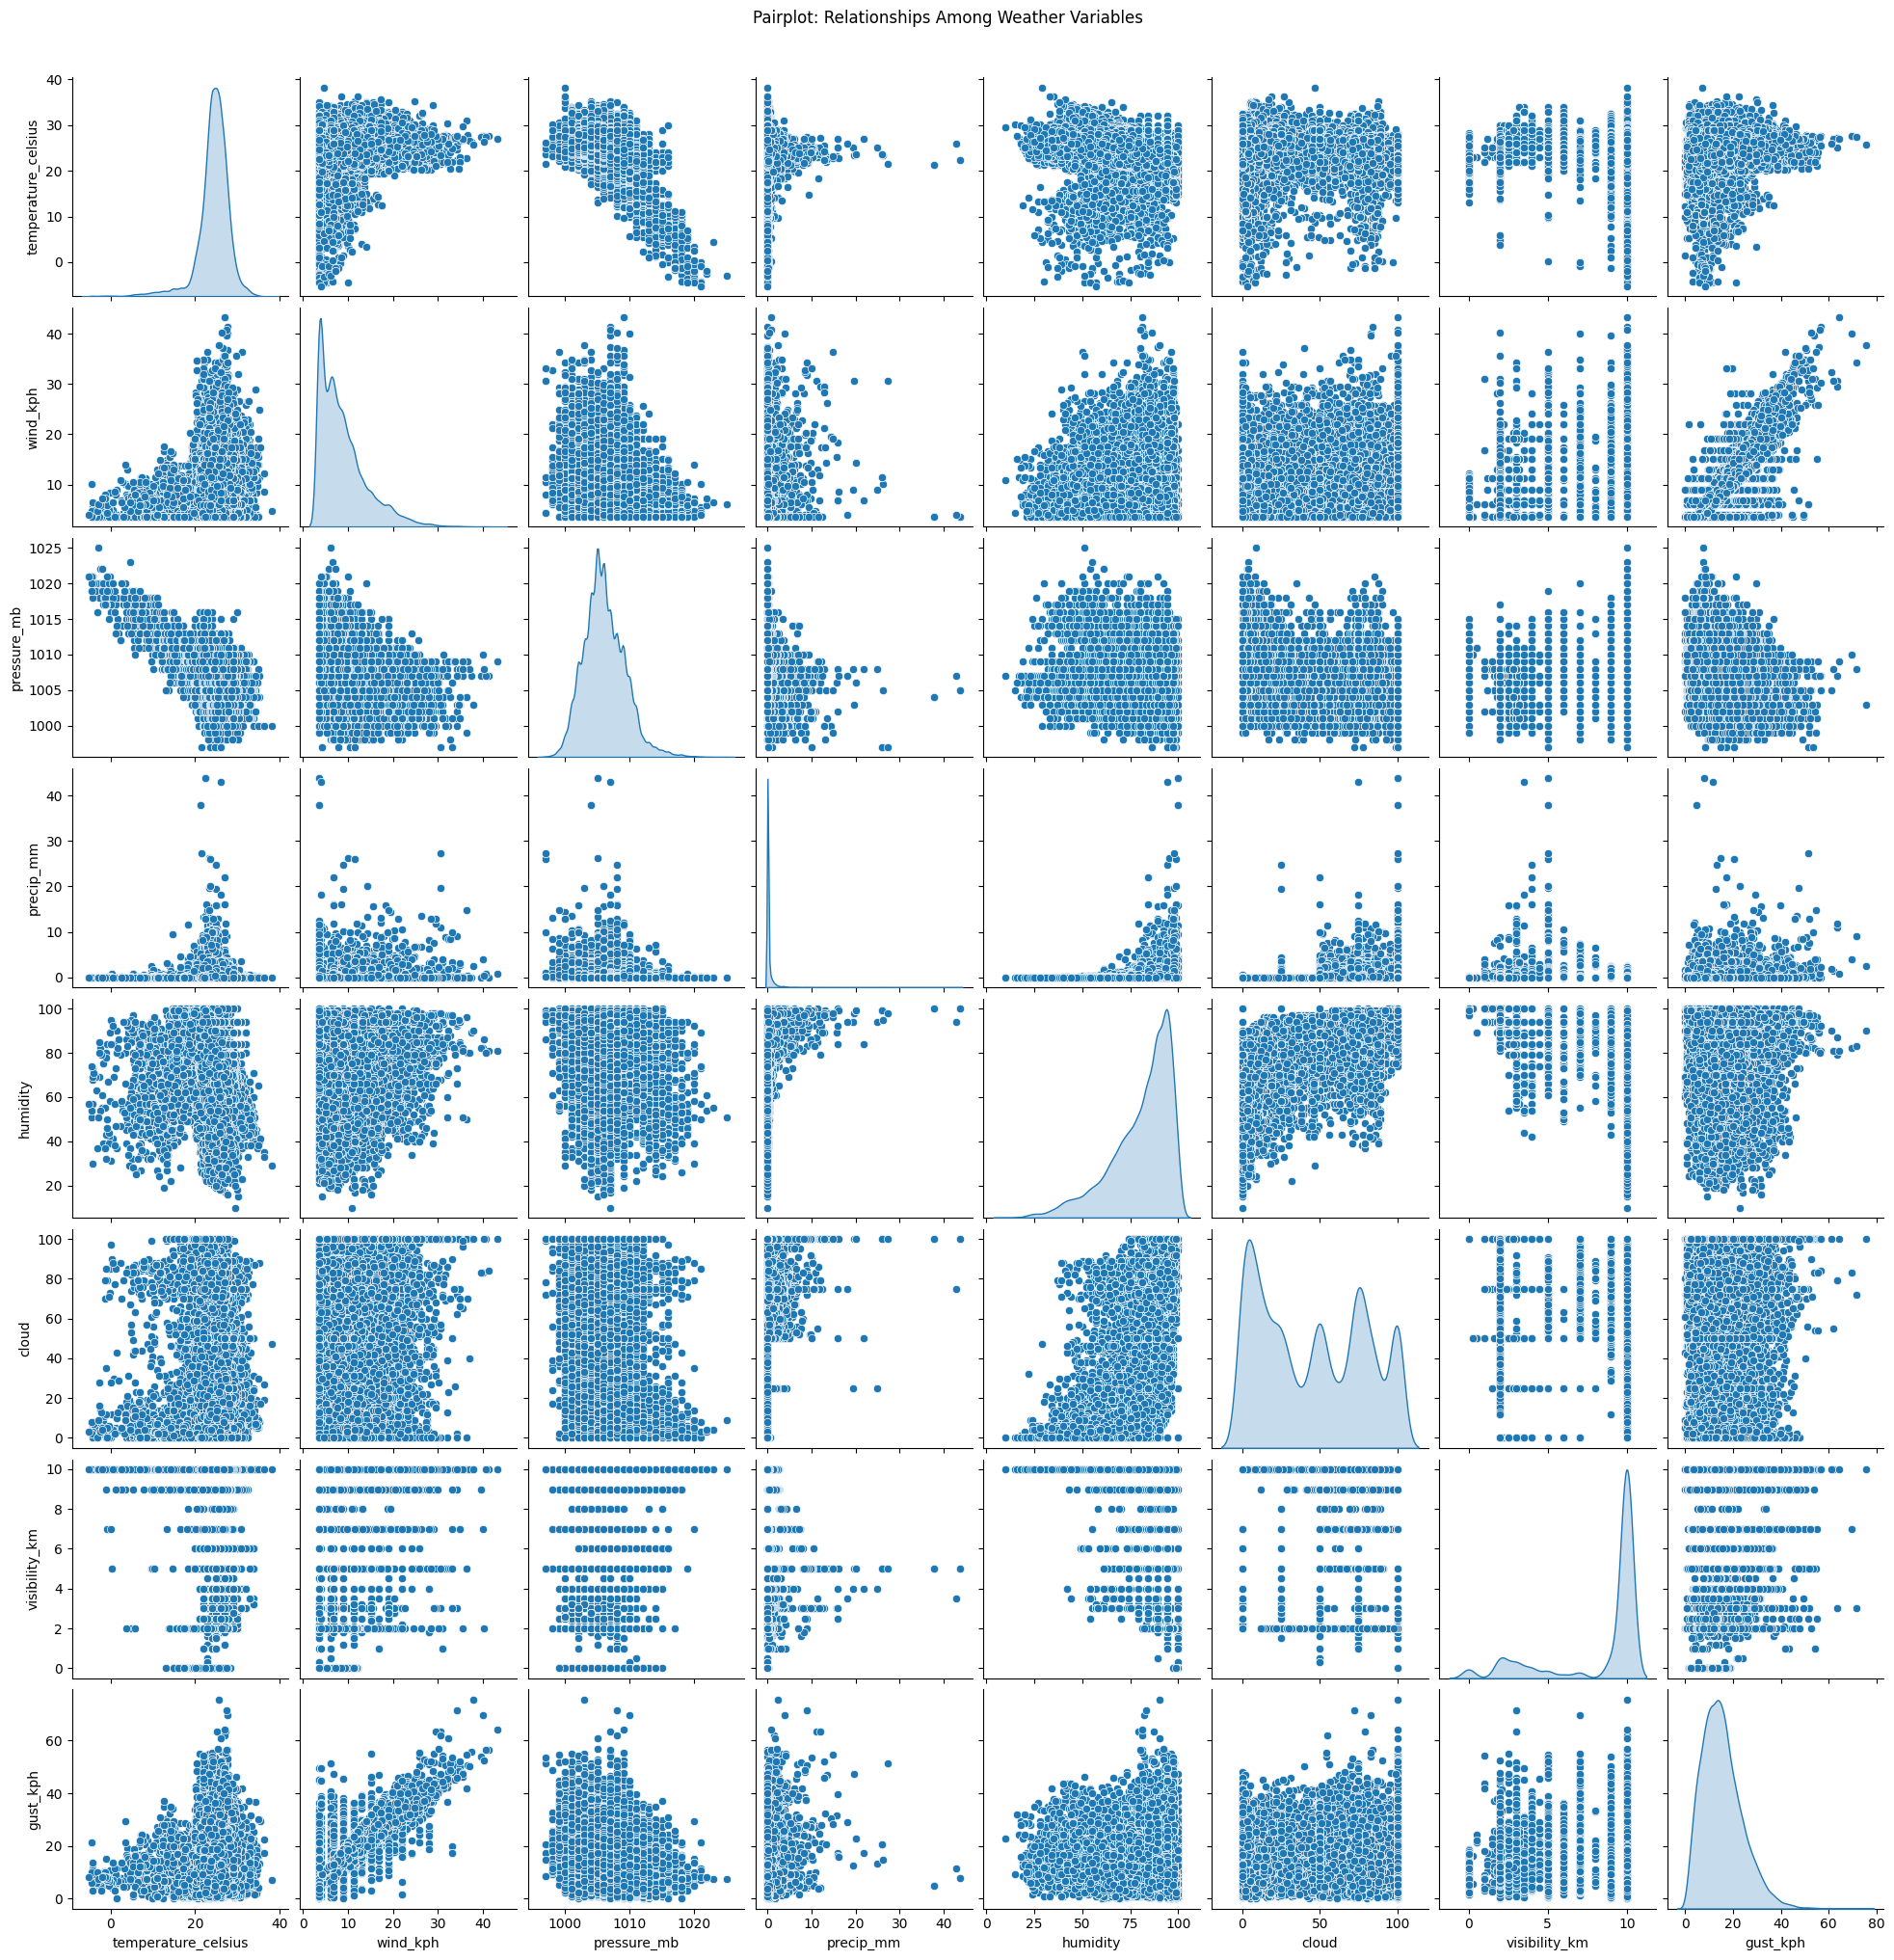

In [15]:
sns.pairplot(df2[['temperature_celsius', 'wind_kph','pressure_mb', 'precip_mm', 'humidity', 'cloud', 'visibility_km', 'gust_kph']],
             diag_kind="kde", palette="Set2")
plt.suptitle("Pairplot: Relationships Among Weather Variables", y=1.02)
plt.show()

# Distribution

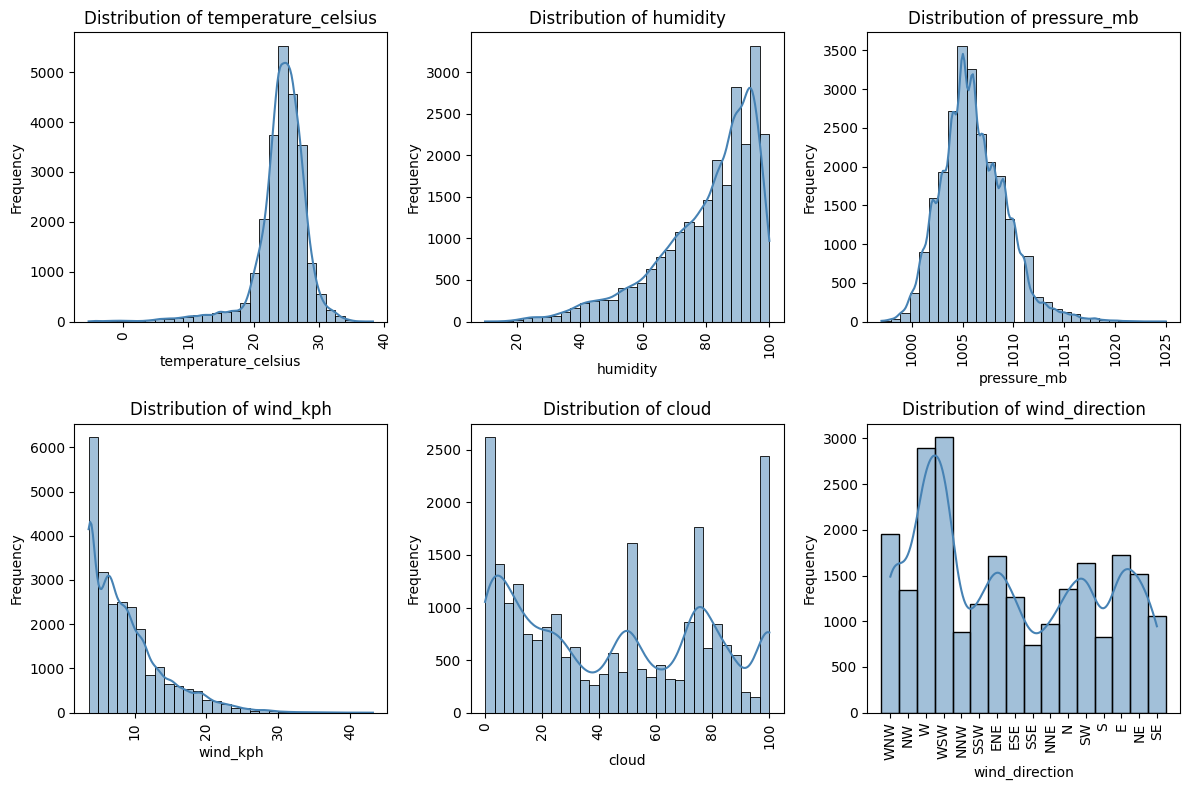

In [16]:
# List of numeric columns to plot
columns_to_plot = ["temperature_celsius", "humidity", "pressure_mb", "wind_kph", "cloud" , "wind_direction"]

# Plot histograms & density plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df2[col], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.xticks(rotation = 90)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


# Regression Analysis

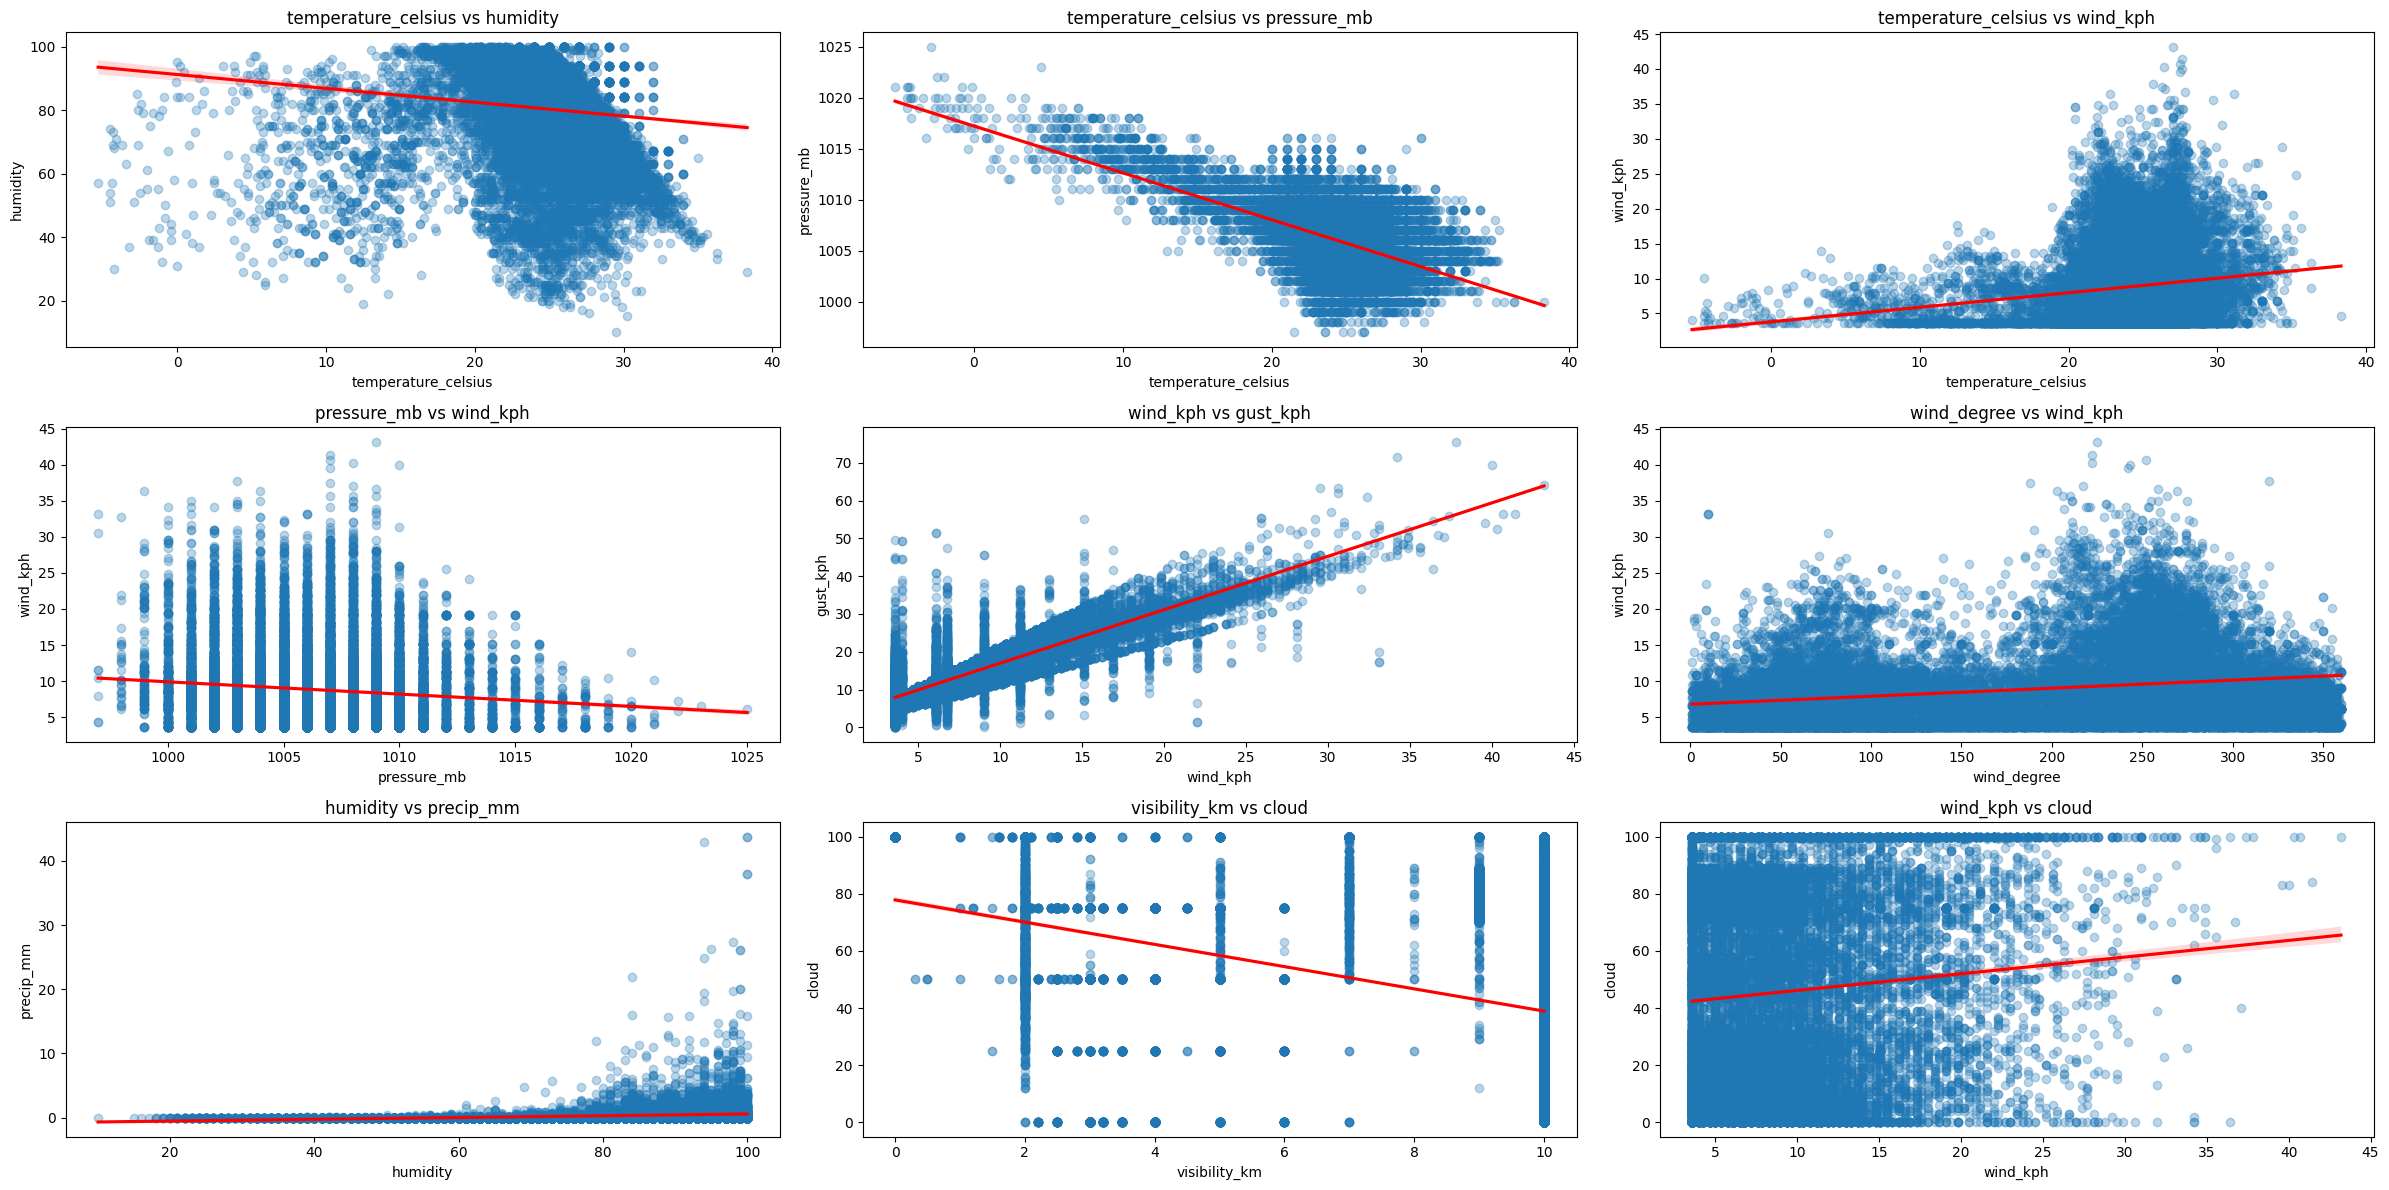

In [17]:
# Expanded scatter pairs for regression analysis
scatter_pairs = [
    ("temperature_celsius", "humidity"),       
    ("temperature_celsius", "pressure_mb"),    
    ("temperature_celsius", "wind_kph"),       
    ("pressure_mb", "wind_kph"),
    ("wind_kph", "gust_kph"),                  
    ("wind_degree", "wind_kph"),               
    ("humidity", "precip_mm"),                 
    ("visibility_km", "cloud"),                
    ("wind_kph", "cloud"),                     
]


# Plot scatter plots with regression lines
plt.figure(figsize=(24, 12))
for i, (x_var, y_var) in enumerate(scatter_pairs, 1):
    plt.subplot(3, 3, i)
    sns.regplot(data=df2, x=x_var, y=y_var, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    plt.title(f"{x_var} vs {y_var}")
    plt.xlabel(x_var)
    plt.ylabel(y_var)

plt.tight_layout()
plt.show()


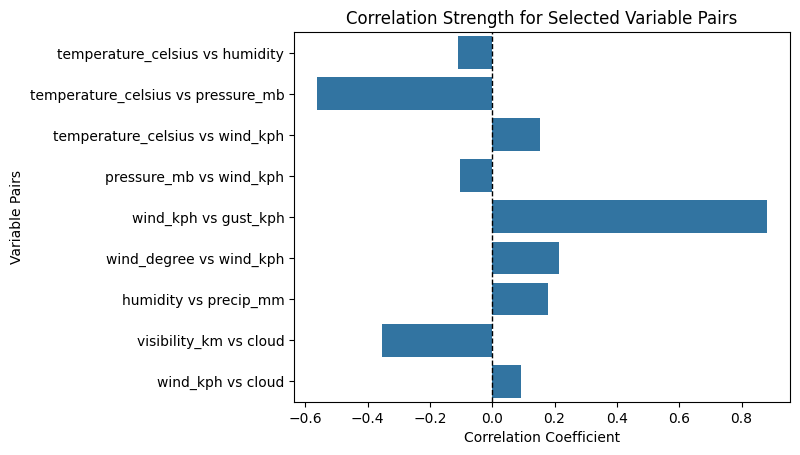

Correlations Among Selected Pairs: 

                     Variable Pair  Correlation
   temperature_celsius vs humidity    -0.109270
temperature_celsius vs pressure_mb    -0.563663
   temperature_celsius vs wind_kph     0.154717
           pressure_mb vs wind_kph    -0.103027
              wind_kph vs gust_kph     0.883354
           wind_degree vs wind_kph     0.214899
             humidity vs precip_mm     0.180045
            visibility_km vs cloud    -0.352279
                 wind_kph vs cloud     0.091149


In [18]:
correlations = {f"{x_var} vs {y_var}": df2[x_var].corr(df2[y_var]) for x_var, y_var in scatter_pairs}
correlation_df = pd.DataFrame(list(correlations.items()), columns=["Variable Pair", "Correlation"])

sns.barplot(data=correlation_df, x="Correlation", y="Variable Pair")
plt.axvline(0, color="black", linestyle="--", linewidth=1) #x=0 line
plt.title("Correlation Strength for Selected Variable Pairs")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Variable Pairs")
plt.show()

print("Correlations Among Selected Pairs: \n")
print(correlation_df.to_string(index=False))

# Wind direction Analysis

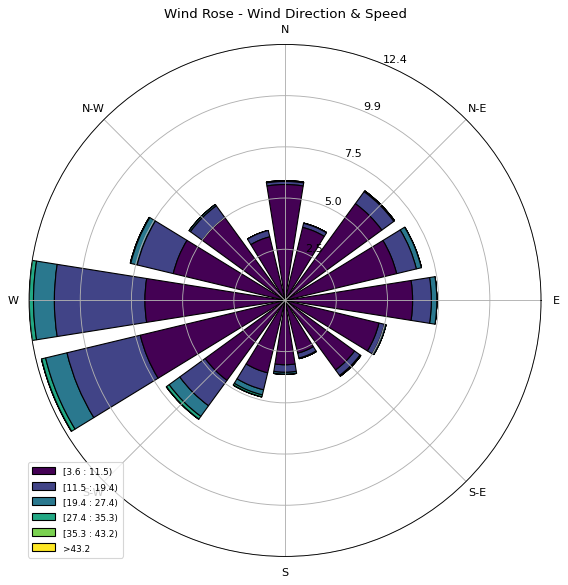

In [19]:
from windrose import WindroseAxes

# Create wind rose plot
ax = WindroseAxes.from_ax()
ax.bar(df2["wind_degree"], df2["wind_kph"], normed=True, opening=0.8, edgecolor='black')
ax.set_legend()
plt.title("Wind Rose - Wind Direction & Speed")
plt.show()


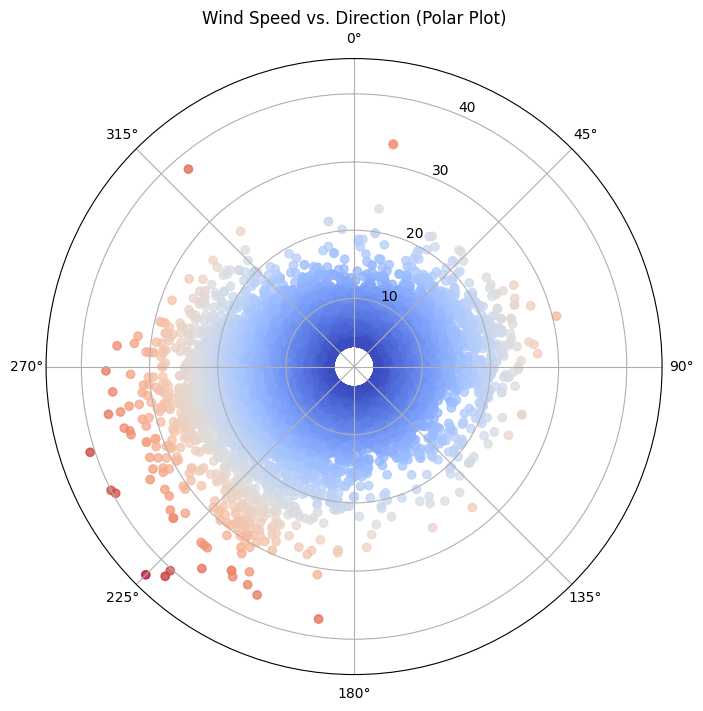

In [20]:
# Convert degrees to radians for plotting
wind_rad = np.radians(df2["wind_degree"])

# Plot polar graph
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.scatter(wind_rad, df2["wind_kph"], c=df2["wind_kph"], cmap="coolwarm", alpha=0.75)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
plt.title("Wind Speed vs. Direction (Polar Plot)")
plt.show()


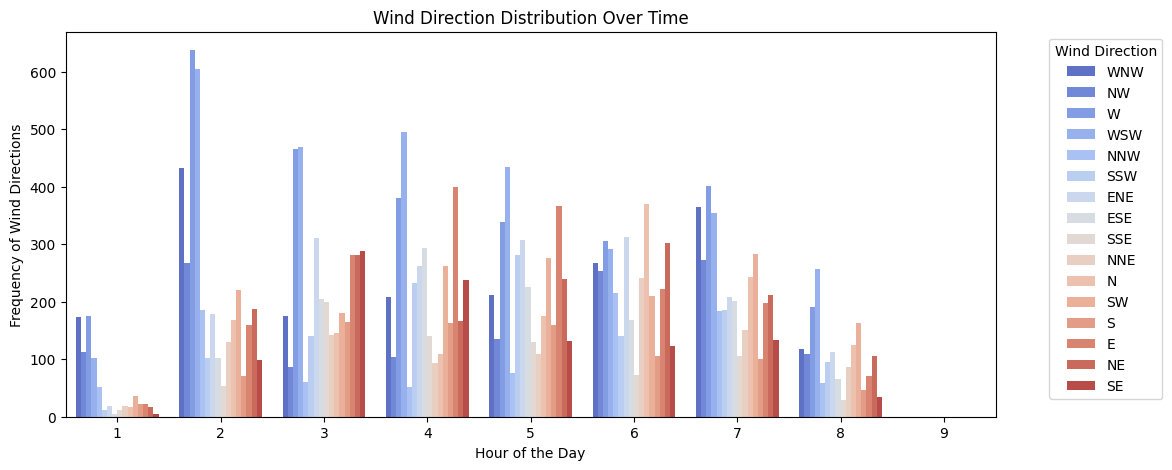

In [21]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df2, x="Hour", hue="wind_direction", palette="coolwarm")
plt.xlabel("Hour of the Day")
plt.ylabel("Frequency of Wind Directions")
plt.title("Wind Direction Distribution Over Time")
plt.legend(title="Wind Direction", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


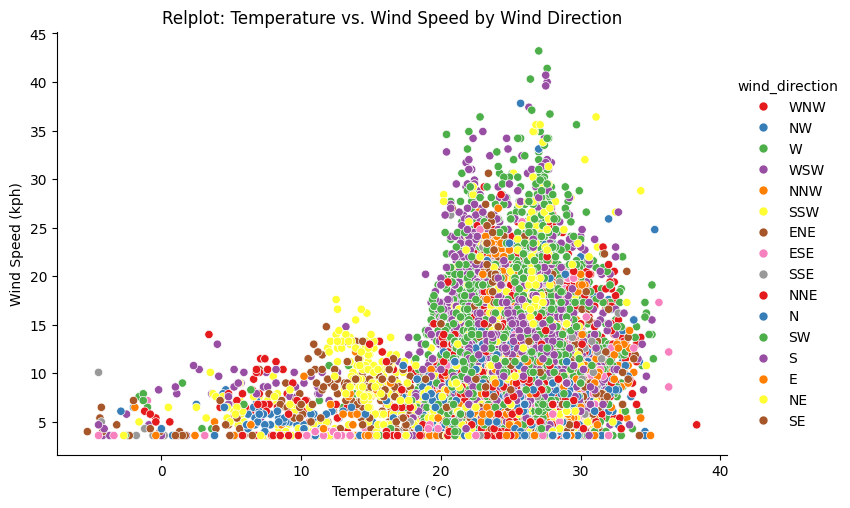

In [22]:
sns.relplot(x="temperature_celsius", y="wind_kph", data=df2, hue="wind_direction",
            kind="scatter", aspect=1.5, palette="Set1")
plt.xlabel("Temperature (°C)")
plt.ylabel("Wind Speed (kph)")
plt.title("Relplot: Temperature vs. Wind Speed by Wind Direction")
plt.show()


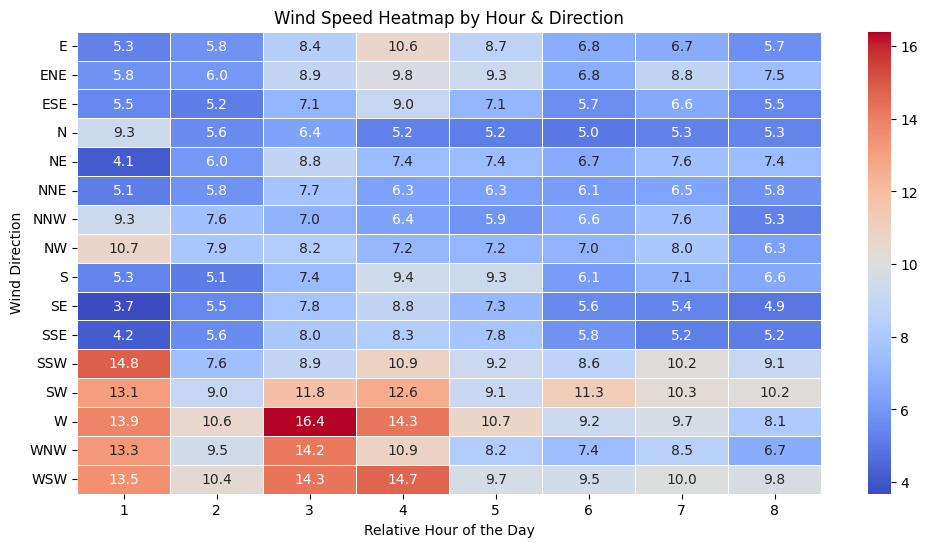

In [23]:
pivot_table = df2.pivot_table(values="wind_kph", index="wind_direction", columns="Hour", aggfunc="mean")

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)
plt.xlabel("Relative Hour of the Day")
plt.ylabel("Wind Direction")
plt.title("Wind Speed Heatmap by Hour & Direction")
plt.show()


# Overall heatmap


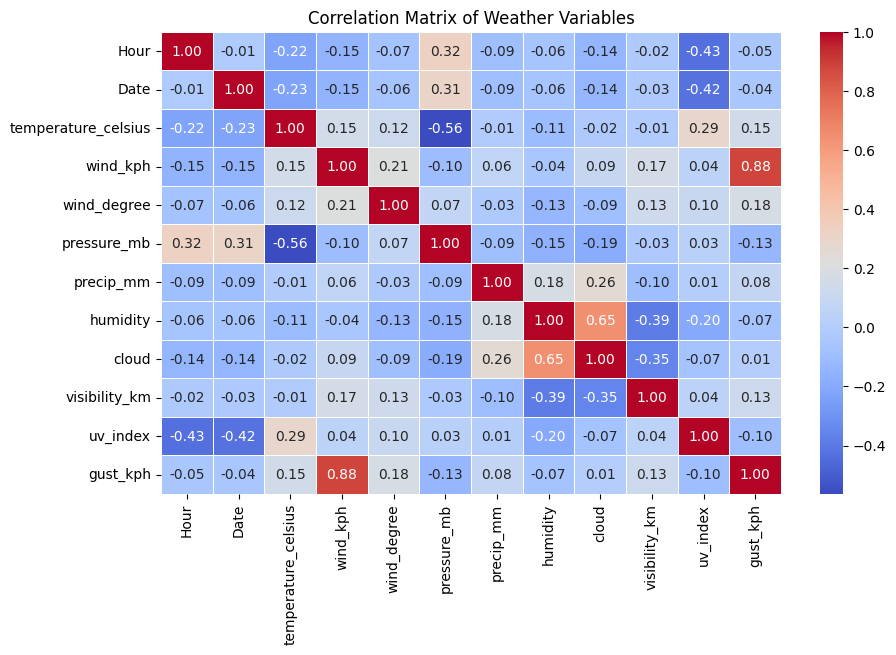

In [24]:
# Compute correlation matrix
correlation_matrix = df2.drop(columns=['wind_direction']).corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Weather Variables")
plt.show()


# 3D Plots


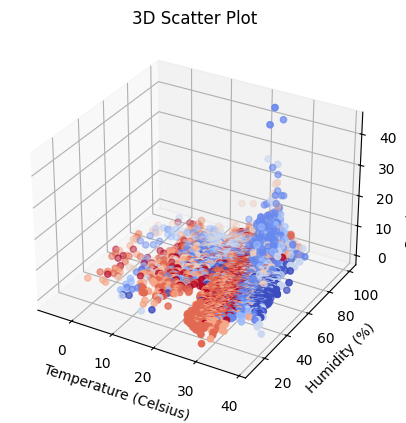

In [25]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df2['temperature_celsius'], df2['humidity'], df2['precip_mm'], c=df2['Hour'], cmap='coolwarm')

# Set labels and title
ax.set_xlabel('Temperature (Celsius)')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Precipitation (mm)')
ax.set_title('3D Scatter Plot')

plt.show()


# Statistical Analysis

In [30]:
from scipy.stats import zscore, pearsonr, spearmanr

numeric_df = df2.select_dtypes(include=['number'])  # Select only numeric columns

In [31]:
summary_stats = numeric_df.describe().T  # Transpose for readability
summary_stats['Variance'] = numeric_df.var()

print("Descriptive Statistics")
print(summary_stats[['mean', '50%', 'std', 'Variance' ]])

Descriptive Statistics
                            mean     50%         std      Variance
Hour                    4.626979     5.0    1.964471      3.859146
temperature_celsius    24.323166    24.8    3.901488     15.221608
wind_kph                8.875347     7.6    5.257236     27.638530
wind_degree           186.925634   216.0  101.276077  10256.843695
pressure_mb          1006.048816  1006.0    3.177885     10.098951
precip_mm               0.284425     0.0    1.200290      1.440696
humidity               80.593353    85.0   15.589535    243.033601
cloud                  45.492480    46.0   33.665745   1133.382365
visibility_km           8.311525    10.0    3.046278      9.279810
uv_index                1.420357     1.0    1.522510      2.318037
gust_kph               15.363830    14.4    8.414274     70.800008


In [32]:
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))

print("Outlier Detection (IQR Method) \n")
for col in numeric_df.columns:
    num_outliers = outliers[col].sum()
    print(f"{col}: {num_outliers} outliers detected.")

Outlier Detection (IQR Method) 

Hour: 0 outliers detected.
temperature_celsius: 1426 outliers detected.
wind_kph: 844 outliers detected.
wind_degree: 0 outliers detected.
pressure_mb: 342 outliers detected.
precip_mm: 4272 outliers detected.
humidity: 593 outliers detected.
cloud: 0 outliers detected.
visibility_km: 5708 outliers detected.
uv_index: 1763 outliers detected.
gust_kph: 406 outliers detected.


In [33]:
# Pearson Correlation
pearson_corr = numeric_df.corr(method='pearson')
# Spearman Correlation
spearman_corr = numeric_df.corr(method='spearman')
# Covariance
cov_matrix = numeric_df.cov()

print("\nCorrelation & Dependencies")
print("\nPearson Correlation:\n", pearson_corr)
print("\nSpearman Correlation:\n", spearman_corr)
print("\nCovariance Matrix:\n", cov_matrix)


Correlation & Dependencies

Pearson Correlation:
                          Hour  temperature_celsius  wind_kph  wind_degree  \
Hour                 1.000000            -0.224770 -0.153717    -0.066648   
temperature_celsius -0.224770             1.000000  0.154717     0.121159   
wind_kph            -0.153717             0.154717  1.000000     0.214899   
wind_degree         -0.066648             0.121159  0.214899     1.000000   
pressure_mb          0.322366            -0.563663 -0.103027     0.071788   
precip_mm           -0.092318            -0.008386  0.062627    -0.025197   
humidity            -0.059975            -0.109270 -0.040871    -0.131093   
cloud               -0.139607            -0.024846  0.091149    -0.090936   
visibility_km       -0.024914            -0.008533  0.166391     0.134437   
uv_index            -0.430380             0.287680  0.041313     0.100090   
gust_kph            -0.047329             0.147298  0.883354     0.179031   

                     pre